In [1]:
import pandas as pd
import numpy as np

## TITLE

In [2]:
# Read dataset

df_title = pd.read_csv("data/depth_doc_with_emotion.csv")
df_title

,title,video_id,url,channel,parent_id,parent,depth,lang,emotion
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,fear
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,anger
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,anger
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,joy
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,joy
...,...,...,...,...,...,...,...,...,...
14327,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,joy
14328,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,fear
14329,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,joy
14330,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,fear


In [3]:
# Calculates the normalized emotion proportions for each depth.

def calculate_label_means(df):
    
    # Find how many depth level are there.
    depth_num = df.depth.nunique()
    emotion_label_means = []
    
    # For each depth find the normalized mean of emotions
    for i in range(depth_num):
        # Store as dictionary
        emotion_label_means.append(df[df['depth'] == i+1]['emotion'].value_counts(normalize=True).to_dict())
        # Add depth level to the dictionary.
        emotion_label_means[i]['depth'] = i+1
    return emotion_label_means

# Transform Emotion Dictionary to Emotion Dataframe

def create_df_emotions(mean_arr):
    # Create dataframe
    df_emotions = pd.DataFrame(mean_arr)
    # Give column names
    df_emotions = df_emotions[["depth", "anger","joy","fear","sadness","surprise","love"]]
    df_emotions.fillna(0, inplace = True)
    return df_emotions

# Drawing emotions with depth-emotion score

def draw_emotions(df, title):
    colors = ['red', 'orange', 'green', 'blue', '#4B0082','#FF1493']
    ax = df.plot(x="depth", figsize=(8,8), color=colors);
    # Depth levels
    ax.set_xticks([1,2,3,4,5]);
    ax.set_title(title)
    ax.set_ylabel("Emotion Score");

In [4]:
# Example of emotion means for each depth
emotion_label_means_title = calculate_label_means(df_title)
emotion_label_means_title[0]

{'anger': 0.5102040816326531,
 'joy': 0.2653061224489796,
 'fear': 0.20408163265306123,
 'sadness': 0.02040816326530612,
 'depth': 1}

In [5]:
df_title_emotions = create_df_emotions(emotion_label_means_title)
df_title_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.510204,0.265306,0.204082,0.020408,0.000000,0.000000
1,2,0.503401,0.170068,0.244898,0.068027,0.013605,0.000000
2,3,0.427068,0.257143,0.254135,0.058647,0.003008,0.000000
3,4,0.379056,0.293879,0.235988,0.075959,0.011431,0.003687
4,5,0.332559,0.368808,0.219444,0.067664,0.008272,0.003160


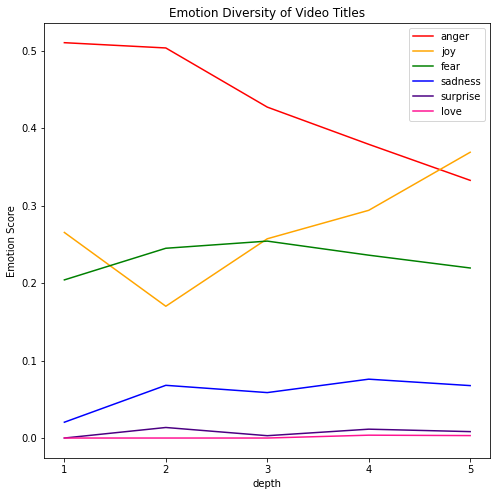

In [6]:
draw_emotions(df_title_emotions, "Emotion Diversity of Video Titles")

## DESCRIPTION

In [7]:
df_desc = pd.read_csv("data/video_desc_with_emotion.csv")
df_desc

,title,video_id,url,channel,parent_id,parent,depth,lang,description,emotion
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,Countries from around the world have insisted ...,anger
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,A furious China is lashing out against global ...,anger
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,What do you do when someone just doesn't like ...,anger
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,How do these rocks move on their own in the de...,joy
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,In this unedited conversation with head of TED...,sadness
...,...,...,...,...,...,...,...,...,...,...
14257,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,How do you bring out the best in yourself? Acc...,joy
14258,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,Why are we constantly holding ourselves back f...,joy
14259,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Designers spend their days dreaming up better ...,joy
14260,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Meet Shaolin Master Shi Heng Yi in his serene ...,joy


In [8]:
# Example of emotion means for each depth
emotion_label_means_desc = calculate_label_means(df_desc)
emotion_label_means_desc[0]

{'anger': 0.4489795918367347,
 'joy': 0.32653061224489793,
 'sadness': 0.12244897959183673,
 'fear': 0.10204081632653061,
 'depth': 1}

In [9]:
df_desc_emotions = create_df_emotions(emotion_label_means_desc)
df_desc_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.448980,0.326531,0.102041,0.122449,0.000000,0.000000
1,2,0.346939,0.517007,0.095238,0.027211,0.013605,0.000000
2,3,0.273414,0.601208,0.087613,0.031722,0.001511,0.004532
3,4,0.194599,0.710692,0.059563,0.026267,0.005549,0.002960
4,5,0.159331,0.701056,0.066723,0.064947,0.004953,0.002617


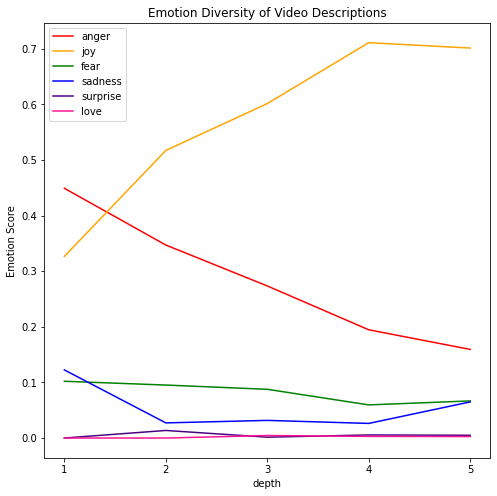

In [10]:
draw_emotions(df_desc_emotions, "Emotion Diversity of Video Descriptions")

## TRANSCRIPTION

In [11]:
df_trans = pd.read_csv("data/final_video_transcription_with_emotion.csv")
df_trans

,title,video_id,url,channel,parent_id,parent,depth,lang,transcript,emotion
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,it's just before dawn on the Philippine islan...,fear
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,u.s border para maker nike is facing a backla...,anger
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,Translator: Rhonda Jacobs Reviewer: Tanya Cush...,fear
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,look at this okay so here's a trail and the t...,joy
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,hello so in just a few minutes um elon musk ...,joy
...,...,...,...,...,...,...,...,...,...,...
13782,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,Translator: Shimaa Nabil\nproofreader: Hussain...,anger
13783,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,[Applause] every once in a while something b...,joy
13784,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Translator: Ying Jun Ji\nInterpreter: Nan-Kun Wu,anger
13785,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,"Translator: Eman Shafeeq, Proofreader\n: Amal ...",fear


In [12]:
# Example of emotion means for each depth
emotion_label_means_trans = calculate_label_means(df_trans)
emotion_label_means_trans[0]

{'joy': 0.5714285714285714,
 'anger': 0.24489795918367346,
 'fear': 0.10204081632653061,
 'sadness': 0.08163265306122448,
 'depth': 1}

In [13]:
df_trans_emotions = create_df_emotions(emotion_label_means_trans)
df_trans_emotions

,depth,anger,joy,fear,sadness,surprise,love
0,1,0.244898,0.571429,0.102041,0.081633,0.000000,0.000000
1,2,0.253425,0.602740,0.082192,0.054795,0.006849,0.000000
2,3,0.231132,0.636792,0.072327,0.050314,0.004717,0.004717
3,4,0.218520,0.643162,0.074390,0.054630,0.006199,0.002712
4,5,0.188145,0.689542,0.069783,0.042892,0.006651,0.002699


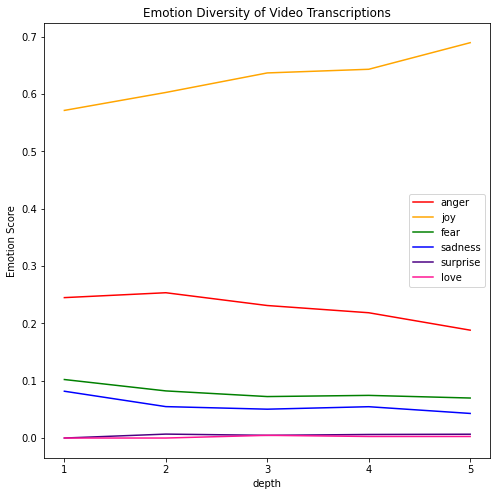

In [14]:
draw_emotions(df_trans_emotions, "Emotion Diversity of Video Transcriptions")